In [1]:
import matplotlib.pyplot as plt
import torch.nn as nn
import torch
import numpy as np
from sklearn.datasets import load_diabetes

diabetes_db  = load_diabetes()
print(diabetes_db.DESCR)


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [8]:
X = torch.tensor(diabetes_db.data) # 10 features
y = torch.tensor(diabetes_db.target) # disease progression

In [14]:
X = torch.tensor(diabetes_db.data, dtype=torch.float32)
y = torch.tensor(diabetes_db.target, dtype=torch.float32)

In [15]:
# Split the data into training and testing sets
n = len(X) # number of instances
split = int(n * 0.8) # split point
X_train = X[:split] # first 80% of X
X_test = X[split:] # last 20% of X
y_train = y[:split] # first 80% of y
y_test = y[split:] # last 20% of y

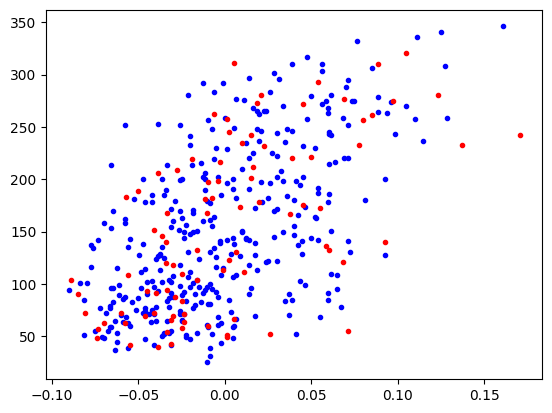

In [28]:
plt.scatter(X_train[:, 2], y_train, label='Training data', marker='.', color='blue')
plt.scatter(X_test[:, 2], y_test, label='Testing data', marker='.', color='red')
plt.show()

In [30]:

class LRModel(nn.Module):
    def __init__(self):
        super(LRModel, self).__init__()
        self.linear = nn.Linear(10, 1)  # One input feature and one output

    def forward(self, x):
        out = self.linear(x)
        return out
    


In [49]:
# TODO (8.5 points, details are given below)

# Make a instance of the model class (0.5 point)
model = LRModel()

# create an optimizer, set a workable learing rate (0.5 point + 0.5 point)
optimizer = torch.optim.SGD(model.parameters(), lr=0.07)  # Stochastic Gradient Descent optimizer

training_losses = []
testing_losses = []

n_itr = 10000

for i in range(n_itr):

    # Train
    # forward propagation 
    model.train() # change model to train mode
    
    # calculate the output of model (0.5 point)
    output = model(X_train)
    
    # calculate loss according to the above equation (0.5 point)
    e = torch.abs(output - y_train)
    loss = e.mean()
    
    training_losses.append(loss.item())


    # backward propagation 
    # clear old gradients (0.5)
    optimizer.zero_grad()
    
    # calculate gradients of parameters (1 point)
    loss.backward()
    
    # gradient descent algorithm (1 point)
    optimizer.step()
    
    # Evaluate, calculate the testing loss (0.5 point)
    model.eval() # change model to eval mode
    
    eval_output = model(X_test)
    
    tl = torch.abs(eval_output - y_test)
    test_loss = tl.mean()
    
    testing_losses.append(test_loss.item())

    # print intermediate losses for certain iterations (1 point)
    if i % 100 == 1: 
        print('Iteration: %04d | Training loss: %f | Testing loss: %f' % \
              (i, loss.data, test_loss.data))
    
    

Iteration: 0001 | Training loss: 151.454224 | Testing loss: 154.635941
Iteration: 0101 | Training loss: 144.454208 | Testing loss: 147.636002
Iteration: 0201 | Training loss: 137.454208 | Testing loss: 140.636078
Iteration: 0301 | Training loss: 130.454224 | Testing loss: 133.636154
Iteration: 0401 | Training loss: 123.488220 | Testing loss: 126.653603
Iteration: 0501 | Training loss: 116.611992 | Testing loss: 119.716164
Iteration: 0601 | Training loss: 109.888138 | Testing loss: 112.898926
Iteration: 0701 | Training loss: 103.561317 | Testing loss: 106.679024
Iteration: 0801 | Training loss: 98.000000 | Testing loss: 101.298767
Iteration: 0901 | Training loss: 93.116997 | Testing loss: 96.785034
Iteration: 1001 | Training loss: 88.833939 | Testing loss: 92.975822
Iteration: 1101 | Training loss: 85.155602 | Testing loss: 89.921440
Iteration: 1201 | Training loss: 82.108948 | Testing loss: 87.634186
Iteration: 1301 | Training loss: 79.486191 | Testing loss: 85.566185
Iteration: 1401 |

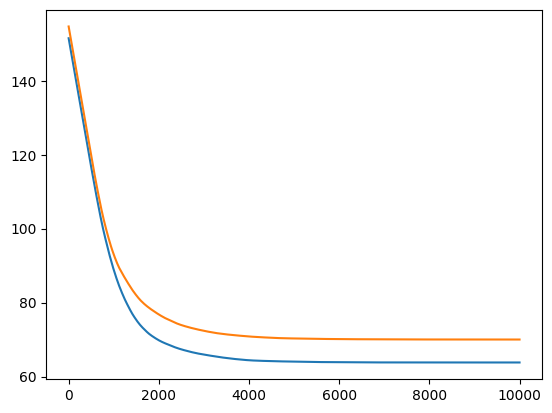

In [50]:
# plot the traing losses (0.5 point) and testing losses (0.5 point)
plt.plot(training_losses, label="Training Loss")
plt.plot(testing_losses, label="Testing Loss")
plt.show()


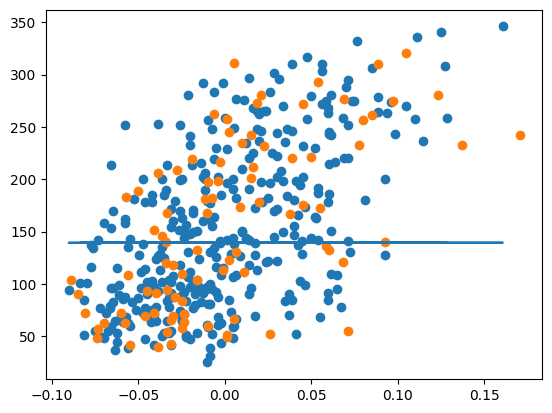

In [51]:
# As our model contains a 10 dimensionsional input we will only plot the relationship between the third variable 'bmi' and the target.
# Again plot the train and test data (from Part1), and add a line where the slope and axis intercept are taken from the model parameters w and b
# (1 point)

plt.scatter(X_train[:, 2], y_train, label="Training Data")
plt.scatter(X_test[:, 2], y_test, label="Testing Data")
#plt.plot(X_train[:, 2], model(X_train).detach().numpy(), label="Model Prediction (Train)")
#plt.plot(X_test[:, 2], model(X_test).detach().numpy(), label="Model Prediction (Test)")
plt.show()